
## Day 25

https://adventofcode.com/2021/day/25

In [1]:
def readInput25(filename):
    with open(filename) as f:
        return [ list(l) for l in f.read().strip('\n').split('\n') ] 

def printMap(t):
    for l in t:
        print("".join(l))

In [2]:
def step(t):
    
    moves = 0
    
    for y in range(len(t)):
        r0 = list(t[y])
        x = 0
        while x<len(t[0]):
            if t[y][x]==">" and t[y][(x+1)%len(t[0])]==".":
                r0[x]="."
                r0[(x+1)%len(t[0])]=">"
                x += 2
                moves += 1
            else:
                r0[x] = t[y][x]
                x += 1
        t[y] = r0
        
    for x in range(len(t[0])):
        c0 = [ t[y][x] for y in range(len(t)) ]
        y = 0
        while y<len(t):
            if t[y][x]=="v" and t[(y+1)%len(t)][x]==".":
                c0[y]="."
                c0[(y+1)%len(t)]="v"
                y += 2
                moves += 1
            else:
                c0[y] = t[y][x]
                y += 1
        for y in range(len(t)):
            t[y][x] = c0[y]
            
    return moves

In [3]:
t0 = readInput25("data/day25test0.txt")

print("Initial state:")
printMap(t0)
print()

for s in range(4):
    step(t0)
    print("After {} steps:".format(s+1))
    printMap(t0)
    print()

Initial state:
...>...
.......
......>
v.....>
......>
.......
..vvv..

After 1 steps:
..vv>..
.......
>......
v.....>
>......
.......
....v..

After 2 steps:
....v>.
..vv...
.>.....
......>
v>.....
.......
.......

After 3 steps:
......>
..v.v..
..>v...
>......
..>....
v......
.......

After 4 steps:
>......
..v....
..>.v..
.>.v...
...>...
.......
v......



In [4]:
t1 = readInput25("data/day25test1.txt")

print("Initial state:")
printMap(t1)
print()

for s in range(10):
    step(t1)
    print("After {} steps:".format(s+1))
    printMap(t1)
    print()

Initial state:
v...>>.vv>
.vv>>.vv..
>>.>v>...v
>>v>>.>.v.
v>v.vv.v..
>.>>..v...
.vv..>.>v.
v.v..>>v.v
....v..v.>

After 1 steps:
....>.>v.>
v.v>.>v.v.
>v>>..>v..
>>v>v>.>.v
.>v.v...v.
v>>.>vvv..
..v...>>..
vv...>>vv.
>.v.v..v.v

After 2 steps:
>.v.v>>..v
v.v.>>vv..
>v>.>.>.v.
>>v>v.>v>.
.>..v....v
.>v>>.v.v.
v....v>v>.
.vv..>>v..
v>.....vv.

After 3 steps:
v>v.v>.>v.
v...>>.v.v
>vv>.>v>..
>>v>v.>.v>
..>....v..
.>.>v>v..v
..v..v>vv>
v.v..>>v..
.v>....v..

After 4 steps:
v>..v.>>..
v.v.>.>.v.
>vv.>>.v>v
>>.>..v>.>
..v>v...v.
..>>.>vv..
>.v.vv>v.v
.....>>vv.
vvv>...v..

After 5 steps:
vv>...>v>.
v.v.v>.>v.
>.v.>.>.>v
>v>.>..v>>
..v>v.v...
..>.>>vvv.
.>...v>v..
..v.v>>v.v
v.v.>...v.

After 6 steps:
v.v>..>vv>
.vv...>>v.
v>..v>.>>v
>.v>.>..>>
.v.>v.vv..
..v>>>vv..
..>..v>vv.
..v..>>...
v...v>.v.v

After 7 steps:
..v.>.>vv>
v.v...>>v.
.v>.v.>>>v
v>..>.>.>>
..v>v.vv..
.v.>>>vv..
..v>.v>v..
.....>.>v.
v.v.v.>v.v

After 8 steps:
>.v.v>>vvv
......>>v.
v.v>..>>>v
.v>.v>.>>>
v..>v.vv..
..v>>>vv..

In [36]:
import numpy as np
from celluloid import Camera

def part1(t,visualize=False):
    frames = []
    nstep = 0
    while True:
        if visualize:
            myCmap = {'.': (240,) * 3, '>': (180, 0, 0), 'v': (0, 180, 0)}
            frame = np.array([[myCmap[c] for c in l] for l in t]) 
            frames.append(frame)
        moves = step(t)
        nstep += 1
        if moves==0:
            break
    return nstep, frames

t1 = readInput25("data/day25test1.txt")

nstep1, frames1 = part1(t1,True)
print("Test 1:",nstep1,"\n")

printMap(t1)

Test 1: 58 

..>>v>vv..
..v.>>vv..
..>>v>>vv.
..>>>>>vv.
v......>vv
v>v....>>v
vvv.....>>
>vv......>
.>v.vv.v..


In [41]:
def animate25(frames):
    f = plt.figure(figsize=(6,6),dpi=92)
    camera = Camera(f)
    for frame in frames:
        f = plt.imshow(frame)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
        camera.snap()    
    anim = camera.animate(blit=True)
    return anim

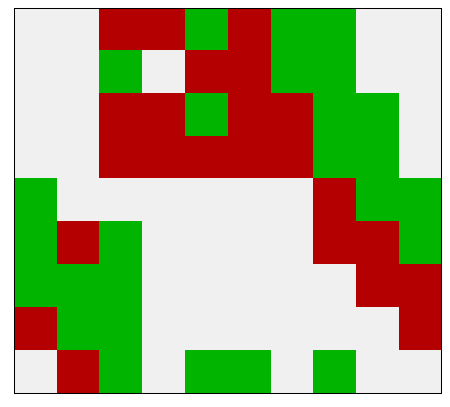

In [42]:
anim1 = animate25(frames1)    
anim1.save('visualisation/day25anim1.gif', writer='imagemagick')

In [38]:
t = readInput25("data/input25.txt")

nstep, frames = part1(t,visualize=True)
print("Part 1:",nstep,"\n")

Part 1: 374 



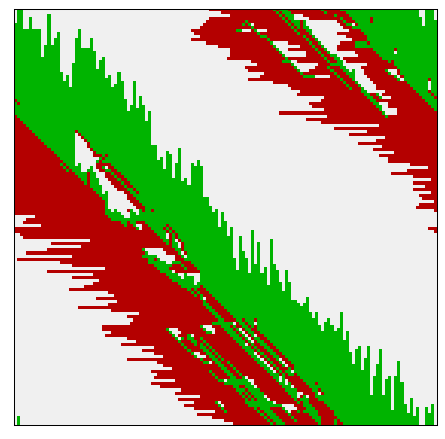

In [43]:
anim = animate25(frames)    
anim.save('visualisation/day25anim.gif', writer='imagemagick')

![Traffic](./visualisation/day25anim.gif)